# 4.18.43 Machine Learning Foundations

In **traditional programming**, if you need to solve a problem you come up with a set of rules, feed the data to those rules and wait for answers to come out on the other side. The **machine learning** approach reverses this logic: you start with your data and the (past/historical) answers to your problem and infer the rules. 

<img src="img/tp-vs-ml.png" width="900">

Let's see how the two approaches differ with a practical example where you work for an e-commerce and the business is suffering from **fraudolent transactions**: 

1. malevolent users use stolen credit cards to make purchases on your website
2. the legitimate credit card holder reports the fraudolent activity to the bank
3. the bank reimburses the legitimate credit card holder
4. the bank requires a refund from the payment gateway system
5. the payment gateway requires a refund from the merchant (ie: you!)

This means that the merchant has to pay twice for the stolen good: the first time when it pyrchased the good/service that it was selling and the second time when it refunded the payment gateway. As you can see, *the merchant has all the interest in reducing fraudulent activity* and thus you have been tasked with assigning a **risk score** to every transaction, so that riskier purchases can be flagged and an additional security step can be added to the checkout process. 

There are two main courses of action that can be considered: 

- in a **traditional programming** approach, we would devise a set of rules that make sense from a business and locical perspective with the objective of assessing whether the transaction could potentially be fraudolent or not (an example of a rule could be "if credit card country is different from IP address country then flag as risky" or "if user has tried more than one credit card without success, then flag as risky"); we would then apply these rules to our data, feed it to a computer and collect our answer on whether the transaction is potentially fraudulent or not. 
- the **machine learning** approach is reversed, as we first collect historical data, including detailed information on each transaction (features) as well as a flag that tells us whether it was a legitimate or a fraudolent purchase (labels/answers). We then leverage an appropiate machine learning model to find the set of rules for us (via given features) using existing examples (labels). 

### Types of learning

There are three main paradigms in machine learning: 

- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning

#### Supervised learning

It's probably the most widely used family of ML models. In fact, a perfect example of supervised learning is the one we just saw in the previous section: the model learns by looking at the answers (ie: labels, this is the supervisor) in advance and deducing how to form a model (ie: a set of rules based on features of the data) by finding patterns and reducing to a minumum the errors produced by the rules it found. 

Below are some examples of supervised learning algorithms and the problems they solve: 

- **[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)**: predicting trends, fitting a curve to data points, describing relationships between variables 
- **[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)**: classifying data into two categories, finding the best way to split a dataset 
- **[Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)**:  classifying data into multiple categories and/or making predictions 
- **[Neural Networks](https://en.wikipedia.org/wiki/Neural_network)**: classifying data and real-world images, videos and audio sequences  

#### Unsupervised learning

It is also possible to model data without having corresponding labels or responses. With enough data, it may be possible to find patterns and structure on raw data. Two of the most powerful tools at your disposal in such cases are **clustering** and **dimensionality reduction**:

- The former is the process of splitting data into buckets (clusters) of similar items. One of the most popular clustering algorithms is **[k-means](https://en.wikipedia.org/wiki/K-means_clustering)**.
- The latter is about manipulating the data to view it from a much simpler perspective, by getting rid of redundant features. This allows you to explain the same data in a lower dimensional space and see which features matter. Two popular algorithms that help with this kind of problems are **[principle component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)** (PCA), and **[autoencoders](https://en.wikipedia.org/wiki/Autoencoder)**.

#### Reinforcement learning

If you look at how a child learns, it involves interactions with his/her environment and some kind of positive or negative feedback that informs the child on whether such action should be repeated or not. Reinforcement algorithmns work in the same way: the environment acts as a teacher, providing hints as opposed to definite answers. The learning system receives feedback on its actions, without explicitly knownig if it’s progressing in the right direction or not. 

<img src="img/reinforcement-learning.jpeg" width="500">

> In other words, reinforcement learning is a type of machine learning that interacts with the environment to learn which combination of actions yields the most favorable results. 

Reinforcement learning is a fascinating and quickly developing branch of machine learning, where reaserch is florid and papers are being produced every day. Check out [this short video](https://www.youtube.com/watch?v=Lu56xVlZ40M) where a research paper is explained by an animation produced by a RL agent. 

One of the companies at the forefront in the research and applications of reinforcement learning (and machine learning in general) is DeepMind; check out some of [their projects](https://www.deepmind.com/impact) and how they benefit society. 

### Linear Regression

Let's have a look at one of the fundamental statistical and machine learning techniques: **[linear regression](https://realpython.com/linear-regression-in-python/)**. Perhaps the most common goal in statistics and data science is to answer the question: 

> Is variable X associated with variable Y? And, if so, what is their relationship and can we use X to predict Y?

As a practical example, let's import our familiar `penguins` dataset:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


First of all, notice that there are a couple of rows containing `nan` values: 

In [3]:
df[pd.isna(df.flipper_length_mm)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Let's remove those `nan`s from the `df` DataFrame: 

In [4]:
df = df[~pd.isna(df.flipper_length_mm)]

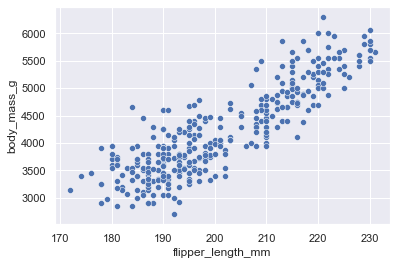

In [5]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)
plt.show()

We can clearly see that there is a positive relationship between the X `flipper_length_mm` and the Y `body_mass_g` variables, since as one grows, the other seems to grow proportionally; we would say that there is a strong positive **correlation** between the two and we can even calculate it. 

In [6]:
correl = df.flipper_length_mm.corr(df.body_mass_g)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: 0.87


#### The Linear Equation

But this is not enough for us: the difference is that while correlation measures the strength of an association between two variables, **regression quantifies the nature of the relationship**. 

Simple linear regression estimates **exactly how much Y will change when X changes** by a certain amount. In fact, what we are trying to do is to **come up with a model (such as a line) that summarises the relationship between X and Y**; such a line would have to be as close as possible to all the data points, in fact, we say that the regression line is that line that **minimises the distances** between itself and each data point. 

So, how do we define this line? From high school calulus, you may remember that the equation of a line is given by the following formula: 

$$
    Y = b_0 + b_1X
$$

where: 

- $X$ is known as the predictor or independent variable (or feature in ML lingo)
- $Y$ is known as the response or dependent variable (or target in ML lingo)
- $b_0$ is known as the intercept (or constant)
- $b_1$ is known as the slope for $X$ (or coefficient). 

<img src="img/linear-regression.jpeg" width="500">

Potentially, we could try different intercepts and slopes until we find one that fits well our data visually (see the scatterplot below). As you probably already guessed, his solution would be quite time consuming and inefficient.

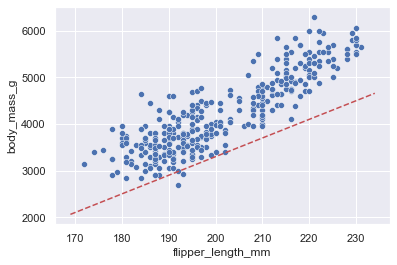

In [7]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

#intercept = -5700
#slope = 50
intercept = -4700
slope = 40

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='r')

plt.show()

#### The Method of Least Squares

A much more efficient solution was initially devised by [Carl Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) at the beginning of the 19th Century and it is known as the method of the **[least squares](https://en.wikipedia.org/wiki/Least_squares)** (this linear regression method is also known as OLS, which stands for Ordinary Least Squares). In simple terms, it works by **minimizing the sum of the squares of the residuals** (where a residual is the difference between an observed value and the value fitted by a model). 

<img src="img/least-squares.png" width="700">

Looking at the picture above, imagine a line that, passing through the data in the scatterplot, **minimises the distance of each point with respect to the line** itself. In fact, the equation we saw above, does not imclude avery important factor (especially for statisticians), that is the error (or deviation) that the model (the line) makes when it tries to fit all the data points. We can rewrite the equation of the regression model in this more accurate formulation: 

$$
    Y = b_0 + b_1X + \epsilon
$$

where $\epsilon$ represents the error term. 

With some basic arithmetic operations, we can rewrite the above equation in terms of the error: 

$$
    \epsilon = Y - b_0 - b_1X 
$$

we just found an equation for the distances between each data point and the regression line. 

Nevertheless, take a moment to thiink about the fact that **we don't know the precise equation** for the line that best fits our data, in fact we still need to **estimate the coefficients** (intercept and slope) of the regression line. However, we do know that we want to **minimise the errors**, that is the distances from the data points and our regression line. 

And this is precisely what we are going to do, more technically we **minimise the sum of squared errors**: 

$$
    \begin{align*}
    &\min_{b_0, b_1} \sum_{i = 1}^{n} \epsilon^2 \\
    &\min_{b_0, b_1} \sum_{i = 1}^{n} (Y - b_0 - b_1X)^2
    \end{align*}
$$

#### Coefficient Estimates

The above can be read as follows: **find the values of the parameters $b_0$ and $b_1$ such that they minimise the sum of squared errors**. From calculus, we know that to find the minimum of an equation we should take its first derivative and set it equal to zero. From there, we can then derive the estimated values of $\hat{b_0}$ and $\hat{b_1}$ (the little $\hat{}$ sign indicates that it is an *estimate*). We won't see the mathematical procedure (which actually involves *partial* derivatives), but if you're curious, check out [this Medium page](https://towardsdatascience.com/linear-regression-derivation-d362ea3884c2).

The above procedure leads us to the following estimates for our regression line coefficients $b_0$ (the intercept) and $b_1$ (the slope): 

$$
    \begin{align*}
    b_0 & = \overline{y} - b_1 \overline{x} \\
    b_1 & = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2}
    \end{align*}
$$

where $\overline{x}$ and $\overline{y}$ are, respectively, the sample mean of $x$ (independent variable | predictor | feature) and $y$ (dependent variable | response | target). 

To get a better understanding of what's going on, let's plot the mean of $x$ (in green) and $y$ (in red) on the data scatterplot. [Check out this video](https://www.youtube.com/watch?v=3g-e2aiRfbU) to get a better geometric intuition on what the deviations from the mean in the above formulas mean. 

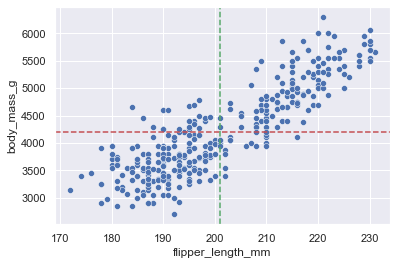

In [8]:
graph = sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)
graph.axhline(np.mean(df.body_mass_g), linestyle='--', color='r')
graph.axvline(np.mean(df.flipper_length_mm), linestyle='--', color='g')
plt.show()

At this point, it should be clear that we can **use the above equations** to calculate the coefficients $b_0$ and $b_1$ that will be used **to define the regression line** (that is, our regression model). Let's define a function `lin_reg_coef()` that, given a predictor $x$ and a response $y$, returns the regression line's coefficients $b_0$ and $b_1$. 

In [9]:
def lin_reg_coef(x, y): 
    
    # calculate the means of the X and Y variables
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    
    # calculate the deviations from the mean of each data point (for X and Y)
    X_mean_dev = [el-X_mean for el in x]
    Y_mean_dev = [el-Y_mean for el in y]
    
    # calculate the covariance between X and Y and the variance of X
    XY_covar = np.sum(np.array(X_mean_dev) * np.array(Y_mean_dev))
    X_var = np.sum(np.array(X_mean_dev)**2)
    
    # calculate the slope (b_1) and intercept (b_0) coefficients
    b_1 = XY_covar/X_var
    b_0 = Y_mean - b_1*X_mean
    
    return b_0, b_1        

In [10]:
intercept, slope = lin_reg_coef(x=df['flipper_length_mm'], y=df['body_mass_g'])

print('Intercept:', intercept)
print('Slope:', slope)

Intercept: -5780.831358077065
Slope: 49.685566406100094


#### Plotting the Regression Line

At this point, given the regression coefficients, we can easily draw the regression line on top of our data points: 

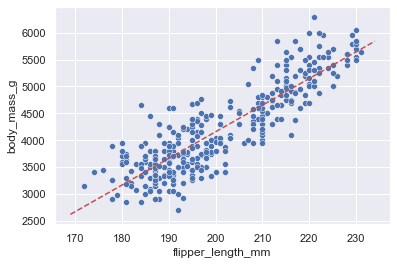

In [11]:
# plot the data points using a scatter plot
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

Let's stop and think about **how we can interpret** the chart above. Remember that our **target variable** $y$ represents the `body_mass_g`, whereas our predictor variable $x$ shows the `flipper_length_mm`. With this regression model we are saying that **there is a precise relationship** between the *flipper length* and the *body mass* of a penguin, which is given by the following formula: 

$$
    \text{body mass} = -5780.83 + 49.69 \times \text{flipper length}
$$

This means that, if we see a new penguin and we measure its flipper, we can estimate his body mass using the above formula; for example: 

1. The new penguin's flipper measures 205mm
2. We plug this new value into the formula and compute: 
    1. $205 \times 49.69 = 10235.23$
    2. $10235.23 - 5780.83 = 4454.395$
3. Therefore the estimated body mass of the new penguin is about 4405g 

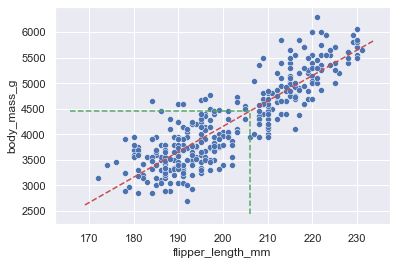

In [12]:
# plot the data points using a scatter plot
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot

# plot the reference lines to the x-y coordinate axes
plt.plot((axes.get_xlim()[0], 206), (4454.3953, 4454.395), 'g--')
plt.plot((206, 206), (axes.get_ylim()[0], 4454.395), 'g--')

plt.show()

### Linear Regression in Python

Luckily for us, there are several libraries that allow us to easily perform linear regression in Python, let's see two of the most popular: 

- `scikit-learn` is probably the [most popular Python library for Machine Learning](https://scikit-learn.org/stable/) and of course it has a dedicated `LinearRegression` module; 
- `statsmodels` is a very [popular Python module with a focus on statistical models](https://www.statsmodels.org/stable/index.html), which provides a more comprehensive *statistical output* compared to scikit-learn. 

In this section you will see how easy it is to perform a **linear regression in Python** using `statsmodels`. We're ready to import the `statsmodels` library and build our model: 

1. first we define Y and X as a pandas series representing the target and predictor variables, respetively; 
2. we also use the `sm.add_constant()` function to add a constant to the model we're creating; 
3. we define the OLS (Ordinary Least Squares) model by passing the Y and X variables to the `sm.OLS()` function; 
4. finally, we call the `.fit()` method, which fits the regression line to our data (that is, estimates the parameters $b_0$ and $b_1$).

In [1]:
import statsmodels.api as sm
Y = df['body_mass_g']
X = df['flipper_length_mm']
X = sm.add_constant(X)   # add a constant to the model
model = sm.OLS(Y,X)
results = model.fit()

NameError: name 'df' is not defined

Using the `.summary()` method on the `results` object, we can produce a series of **summary statistics** that include the **estimated coefficients** of the regression line as well as other **goodness of fit** metrics, that inform us on how well our model fits the data. 

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          4.37e-107
Time:                        12:05:33   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5780.8314    305.815    -18.903      0.000   -6382.358   -5179.305
flipper_length_mm    49.6856      1.518     32.722      0.000      46.699      52.672
==============================================================================
Omnibus:                        5.634   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.585
Skew:                           0.313   Prob(JB):                       0.0613
Kurtosis:                       3.019   Cond. No.                     2.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Regression Estimates

Let's focus on the second table for a moment: 

In [15]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-5780.8314,305.815,-18.903,0.000,-6382.358,-5179.305
flipper_length_mm,49.6856,1.518,32.722,0.000,46.699,52.672


We can see that the intercept and slope **coefficients** are identical to the ones we found "manually", however here we can see they are coupled by a series of other statistics, such as the **standard error**, the **t-statistic**, the **p-value** and **confidence intervals**. 

This is because, as we said before, **the regression coefficients are estimates** and, as such, statisticians like to pair them with a sense of **how confident we are that their values are reliable**. 

You should be familiar with some of the names that have been dropped in the previous two paragraphs, in fact the t-statistic, p-value and confidence intervals have been produced by running a **test of hypothesis** on the estimated coefficients. Specifically, the set of hypothesis for the slope coefficient is: 

$$
    \begin{align*}
    &H_0: b_1 = 0 \\
    &H_1: b_1 \neq 0
    \end{align*}
$$

This means that the **null hypothesis** (the one we're hoping to reject) is that **the slope coefficient of our regression line is zero**. Graphically, this means that the regression line is horizontal; more intuitively, it means that there is **no relationship** between the dependent variable $Y$ and its predictor $X$. On the other hand, the **alternative hypothesis** is that there is a positive or negative relationship between $X$ and $Y$ (the coefficient is either positive or negative). 

The `statsmodels` function uses a [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) and automatically produces p-values and confidence intervals for our estimates. Notice that we interpret the **p-values** in the same way we did for the permutation test: 

> the p-value is the probability of observing a value as extreme or more extreme than the one observed, assuming that the null hypothesis is true. 

In this case the *observed* statistic is the $b_1$ slope coefficient and the null hypothesis states that there is no relation between the dependent and independent variables. Since our **p-value is smaller than $\alpha=.05$** (our chosen level of significance), we conclude that the slope coefficient is statistically significant. 

#### Coefficient of Determination

Another useful statistic available from the `.summary()` output is the **R-squared** ($R^2$), also known as the **[coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)**, which **measures how well the regression predictions approximate the real data** points. An $R^2$ of 1 indicates that the regression predictions perfectly fit the data.

More technically, it's the proportion of the variation in the dependent variable ($Y$) that is predictable from the independent variable ($X$) and it can be calculated using the following formula: 

$$ 
    \begin{align*}
    R^2 &= 1 - \frac{SS_{res}}{SS_{tot}} \\
        &= 1 - \frac{\sum_{i=1}^{n}\epsilon^2}{\sum_{i=1}^{n}(y_i - \overline{y})^2}
    \end{align*}
$$

So, what is the **difference between correlation and the $R^2$**? Correlation measures the strength of the relationship between two variables and it ranges between $[-1, 1]$, whereas the $R^2$ measures the amount of variation in the data that is explained by the model and it ranges between $[0, 1]$. 

As an example, if a model has an $R^2 = 0.50$, then approximately half of the observed variation can be explained by the model's inputs.

#### Predictions

One of the most important features of a regression model is that, given an input feature $X$, can **predict** the corresponding estimated $Y$ output (as we briefly saw manually in the previous section). The `statsmodels` library has a very handy `.predict()` method that, applied to an appropriate class object such as our `results`, can produce such a prediction: 

In [16]:
results.predict(np.array([1, 206]))

array([4454.39532158])

You can check that this prediction is the same that we obtained in the previous section, when we computed it manually. Notice that you need to pass an array containing two values in order to get a prediction: 

- a $1$, which is simply the multiplier for the intercept constant; in this example: $1 \times (-5780)$
- the $X$-value input for the model that will multiply the slope coefficient; in this example: $206 \times 49.69$ 

We can plot the new prediction (red dot) on top of the original dataset (blue dots); notice how it lays exaclty on the regression line. 

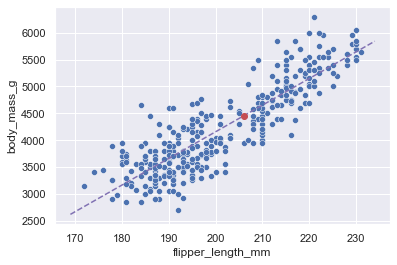

In [17]:
# plot the data points using a scatter plot
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot

# plot the new observed x-value and the relative prediction
plt.plot(206, results.predict(np.array([1, 206]))[0], 'ro')

plt.show()

If we had a series of 10 new penguins with 10 new measurements of their flippers length, we could predict their body mass in the following way: 

In [18]:
# create new observations
new_flipper_length_mm = np.random.normal(np.mean(df.flipper_length_mm), 15, 10)
new_flipper_length_mm

array([178.37917445, 174.65781242, 219.14228631, 205.93583621,
       212.05453054, 193.25341625, 203.92605511, 238.10794814,
       211.53120448, 188.37461396])

In [19]:
# generate new predictions
results.predict(np.column_stack((np.ones(10), new_flipper_length_mm)))

array([3082.03895969, 2897.14097945, 5107.37726058, 4451.20730742,
       4755.2181007 , 3821.07408812, 4351.35019478, 6049.69691084,
       4729.2163492 , 3578.66803304])

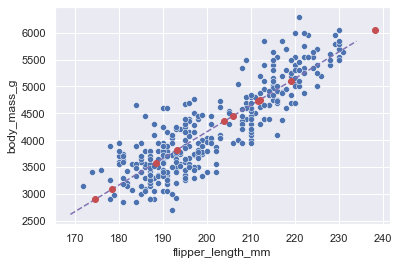

In [20]:
# plot the original dataset
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

# plot the regression line
axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + slope * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot

# plot the new observed x-values and the relative predictions
for x, y in zip(new_flipper_length_mm, results.predict(np.column_stack((np.ones(10), new_flipper_length_mm)))): 
    plt.plot(x, y, 'ro')

plt.show()